In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv('NMDC - Daily.csv')
for i in range (0,len(df)):
    df['Date'][i]=df['Date'][i].replace(' 15:30:00','')
df['Date'] = df['Date'].astype('datetime64[ns]')
df.index = df['Date']

<ipython-input-11-f542a2482ab0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'][i]=df['Date'][i].replace(' 15:30:00','')


In [12]:
#Function that calculates n consecutive days regression slope
def NDaySlopes(n,prices):
    slopes=[]
    finalSlope=0
    for i in range(0,len(df)-n):
        sumx=0
        sumy=0
        sumx2=0
        sumy2=0
        sumxy=0
        nprices=[]
        for j in range(0,n):
            nprices.append([j,prices[i+j]])
        for k in range(0,n):
            sumx=nprices[k][0]+sumx
            sumy=nprices[k][1]+sumy
            sumx2=(nprices[k][0]*nprices[k][0])+sumx2
            sumy2=(nprices[k][1]*nprices[k][1])+sumy2
            sumxy=(nprices[k][1]*nprices[k][0])+sumxy
        currentSlope=((n*sumxy)-(sumx*sumy))/((n*sumx2)-(sumx*sumx))
        slopes.append(currentSlope)
        finalSlope=currentSlope
    for i in range (0,n):
        slopes.append(finalSlope)
    return slopes

In [13]:
nDaysList=[10,20,50,100,200]
for i in nDaysList:
    df['Regr Slope '+str(i)]=NDaySlopes(i,(df['High']+df['Low'])/2)

In [14]:
def Signal(regressionSlope):
    signal=[]
    for i in range (0,len(regressionSlope)-1):
        if (regressionSlope[i]>0 and regressionSlope[i-1]<0) or (regressionSlope[i]>regressionSlope[i-1] and regressionSlope[i+1]>regressionSlope[i]):
            signal.append(True)
        elif (regressionSlope[i]<0 and regressionSlope[i-1]>0) or (regressionSlope[i]>regressionSlope[i-1] and regressionSlope[i+1]<regressionSlope[i]):
            signal.append(False)
        else:
            signal.append(np.nan)
    signal.append(np.nan)
    return signal

In [15]:
df['Signal']=Signal(df['Regr Slope 200'])

In [16]:
buysell=[]
for i in range(0,len(df)):
    if df['Signal'][i]==True:
        buysell.append(df['Close'][i])
    elif df['Signal'][i]==False:
        buysell.append(df['Close'][i])
    else:
        buysell.append(np.nan)
df['Buy/Sell']=buysell

In [17]:
df=df.dropna()
df

,Date,Open,High,Low,Close,Volume,Regr Slope 10,Regr Slope 20,Regr Slope 50,Regr Slope 100,Regr Slope 200,Signal,Buy/Sell
Date,,,,,,,,,,,,,
2008-03-04,2008-03-04,373.33,373.33,349.55,349.55,628,3.264424,-0.639485,3.861169,-1.497314,-1.600451,False,349.55
2008-04-09,2008-04-09,452.01,452.01,452.01,452.01,1798,-8.144576,1.585959,-2.333128,-2.206219,-1.799438,True,452.01
2008-04-10,2008-04-10,474.62,474.62,474.62,474.62,7351,-10.257697,1.704015,-2.552284,-2.183104,-1.789244,True,474.62
2008-04-11,2008-04-11,498.35,498.35,498.35,498.35,5136,-8.623576,2.348620,-2.753898,-2.151899,-1.774024,True,498.35
2008-04-15,2008-04-15,523.27,523.27,473.43,473.43,67243,-4.392606,3.260748,-2.879091,-2.105982,-1.754134,True,473.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-27,2020-02-27,97.50,97.75,94.85,96.10,6736747,-1.674242,-1.810883,-0.252929,0.070819,0.103217,True,96.10
2020-02-28,2020-02-28,93.65,93.65,88.40,91.20,11410640,-2.330758,-1.650865,-0.216420,0.082455,0.109334,True,91.20
2020-03-02,2020-03-02,92.90,95.75,88.55,89.50,7150803,-2.727727,-1.525019,-0.193433,0.091089,0.114413,True,89.50


In [18]:
accuracy=[]
for i in range (1,int(len(df)/2)):
    if (df['Buy/Sell'][i+1]-df['Buy/Sell'][i])>0:
        accuracy.append(1)
    else:
        accuracy.append(0)
    i=i*2
df1=pd.DataFrame()
df1['Tries']=accuracy
accM=df1['Tries'].value_counts()
accM

0    436
1    340
Name: Tries, dtype: int64

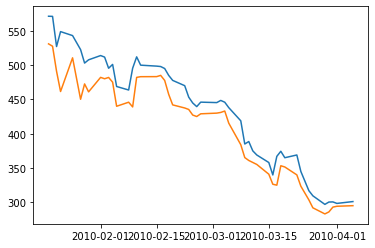

In [30]:
#Volume independant and High-Low dependant